<a href="https://colab.research.google.com/github/rishabh1072/LicensePlate-Number-Recognition/blob/main/LICENSE_PLATE_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
!sudo apt install tesseract-ocr
!pip install easyocr
!pip install pytesseract
import pytesseract

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread('/content/i.jpg')

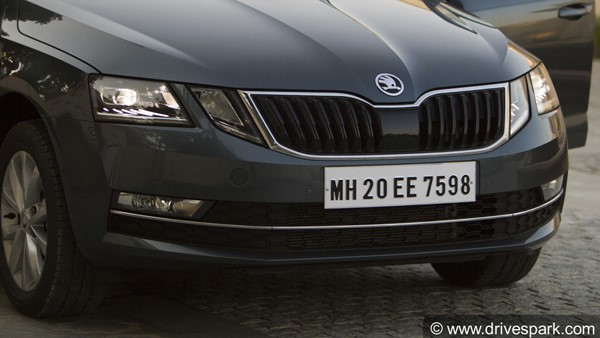

In [ ]:
cv2_imshow(image)

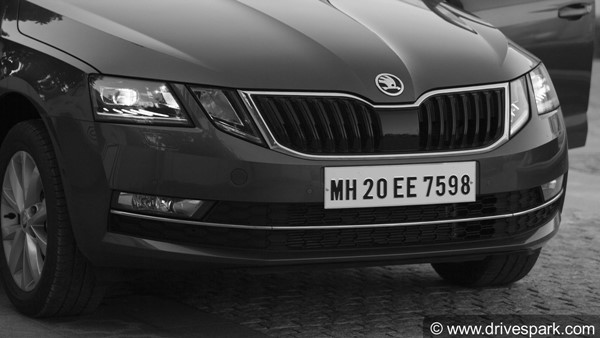

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow( gray)

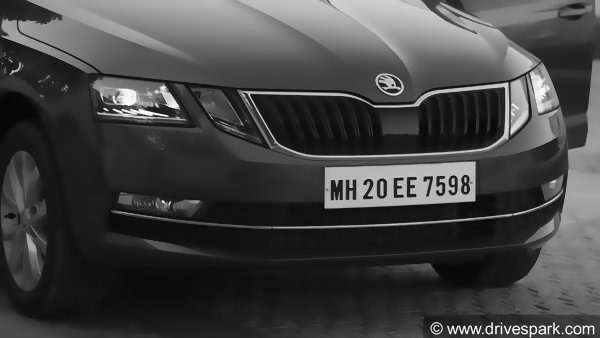

In [ ]:
gray = cv2.bilateralFilter(gray, 11, 17, 17)
cv2_imshow( gray)

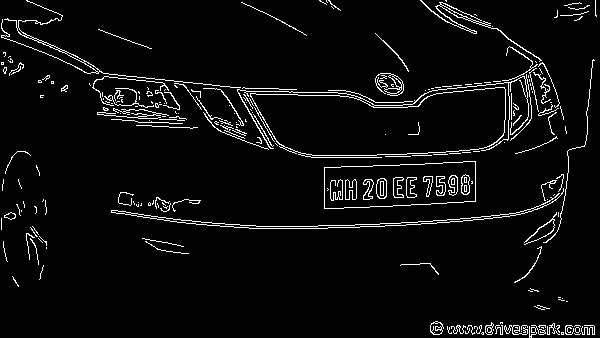

In [ ]:
edged = cv2.Canny(gray, 170, 200)
cv2_imshow( edged)

In [ ]:
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30]

NumberPlateCnt = None 
count = 0

In [ ]:
for c in cnts:

    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:  
        NumberPlateCnt = approx 
        break

In [ ]:
NumberPlateCnt

array([[[475, 161]],

       [[324, 167]],

       [[324, 208]],

       [[475, 201]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [NumberPlateCnt], 0,255, -1)
new_image = cv2.bitwise_and(image, image, mask=mask)

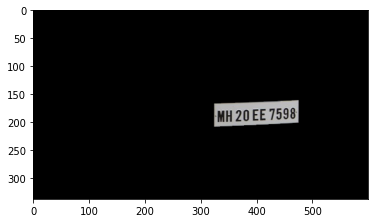

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

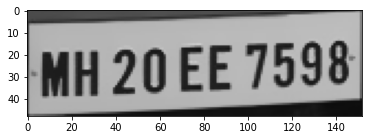

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[1, 9], [152, 9], [152, 45], [1, 45]], 'MH 20 EE 7598', 0.785151791665559)]

In [ ]:
text = result[0][-2]

In [ ]:
print(text)

MH 20 EE 7598
